<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predict behavior to retain customers." </div>

> * Information **DATA**
> https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

- [1. Exploratory Data Anlysis(EDA)](#a)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Dianostics Analytics and Data Visualization](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)
- [3. Data preprocessing and feature engineering](#4)
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Data Splitting](#5.1)
   - [4.2 Model Buiding](#5.2)
       - [4.2.1 Feature selection](#5.2.1)
           <!-- - [4.2.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
           - [4.2.1.2 Model building using L1 Regularization](#5.2.1.2) -->
       - [4.2.2 Feature importance](#5.2.2)
- [5. Model Evaluation](#6) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt # Operation and Visualization
import statsmodels.api as sm 

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
### check multicorre
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Feature selection
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder 

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/4.%20WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [6]:
df.drop(columns='customerID', inplace=True)

In [7]:
df.shape

(7043, 20)

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [8]:
df.drop(index = df[df['TotalCharges']==' '].index, inplace=True)

In [9]:
df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# categoric_columns = []
# yes_no_columns = []
# numeric_columns = []

# def categorize_columns(dataset):
#     columns = list(dataset.columns)
    
#     for i in columns:
#         if len(dataset[i].unique()) > 6:
#             numeric_columns.append(i)
#         elif len(dataset[i].unique()) == 2:
#             yes_no_columns.append(i)
#         else:
#             categoric_columns.append(i)
#     return categoric_columns, yes_no_columns, numeric_columns

In [ ]:
# categorize_columns(df)

In [ ]:
 # df[categoric_columns]

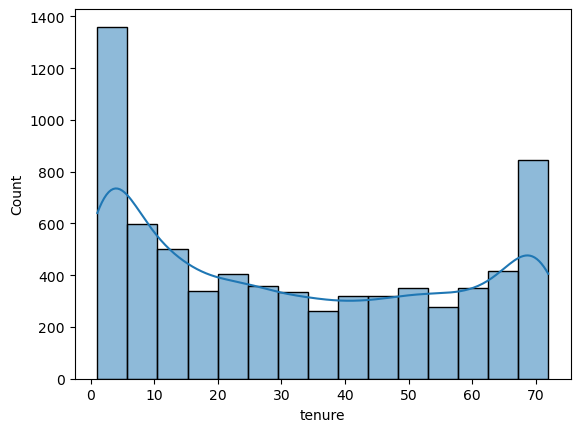

In [12]:
## Deal tunure 0 use interpolation
sns.histplot(data = df, x='tenure', kde=True)
plt.show()

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [14]:
df.duplicated().sum()

22

In [15]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

<Axes: >

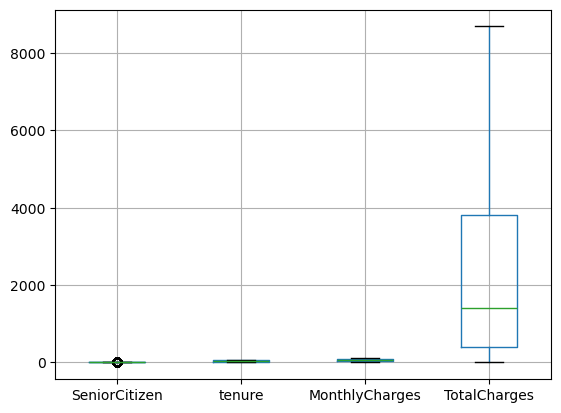

In [18]:
df.boxplot()

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Diagnostics Analytics with Data Visualization</div>

In [ ]:
df.head()

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:blue;
            overflow:hidden;
            font-weight:700">Now, let's understand dataset based on:</div>


#### Gender, Senoirity, Parnter and Dependents
#### Services
#### Security_support
#### Contract type
#### Churn 
#### Charges

<a id="2.1"></a>
# <b>2.1 <span style='color:#00008B'>Gender, Seniority, Partner and Dependends(Customer)</span></b>

In [19]:
df['Churn'].value_counts()

Churn
No     5153
Yes    1857
Name: count, dtype: int64

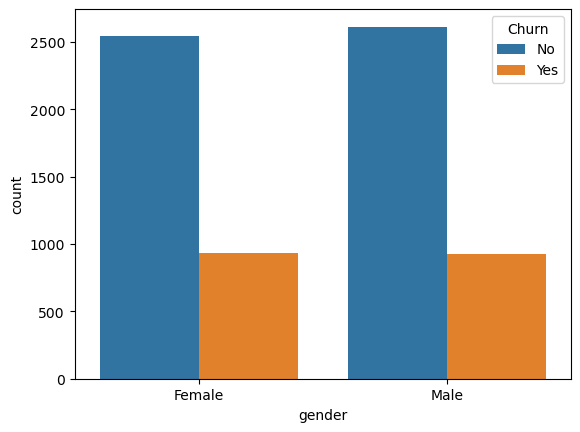

In [20]:
sns.countplot(x = df['gender'], hue = df['Churn']);

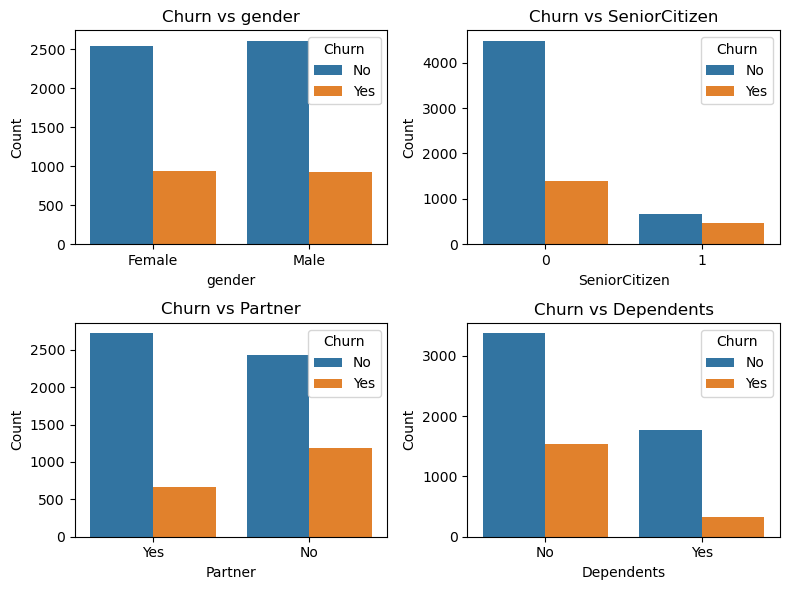

In [21]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Creating a 2x2 grid of plots

# Accessing each subplot using direct indexing
sns.countplot(data=df, x=cols[0], hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title(f'Churn vs {cols[0]}')
axes[0, 0].set_xlabel(cols[0])
axes[0, 0].set_ylabel('Count')

sns.countplot(data=df, x=cols[1], hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title(f'Churn vs {cols[1]}')
axes[0, 1].set_xlabel(cols[1])
axes[0, 1].set_ylabel('Count')

sns.countplot(data=df, x=cols[2], hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title(f'Churn vs {cols[2]}')
axes[1, 0].set_xlabel(cols[2])
axes[1, 0].set_ylabel('Count')

sns.countplot(data=df, x=cols[3], hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title(f'Churn vs {cols[3]}')
axes[1, 1].set_xlabel(cols[3])
axes[1, 1].set_ylabel('Count')
plt.tight_layout()

[enumerate(axes.flat)](https://www.tutorialspoint.com/what-does-axes-flat-in-matplotlib-do)

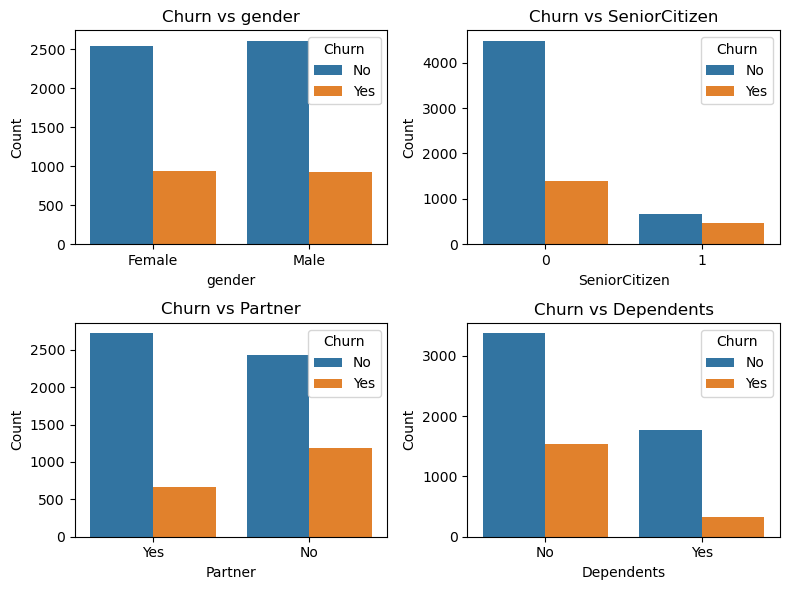

In [22]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

- **Gender** has **no influence** on whether the customer will churn or not. 
- **seniorcitizens**  **churn more** than non-senior in **absolute term** but in **relative term senior citizens churn more** often.
- **Customers without partner churn more** often than their counterparts.<br>
and finally, 
- **customers without dependants churn more** than customers with dependents.


<a id="2.2"></a>
# <b>2.2 <span style='color:#00008B'>Services</span></b>


In [ ]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))

for i, ax in enumerate(axes.flat):
        
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('frequency')
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
df['InternetService'].value_counts()

- Streaming TV, Streaming Movies, Multiple Lines have **no impact** on churn rate.
- Customers who have **fiber optic** tend to **churn** significantly more than ones that have DSL.

Now let's dive deeper into that finding.
We need gender, partner status, dependents status and senior status.

In [ ]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We can conclude that customers who have churned and use phone service are likely to be **non-seniors, without partners and dependents.** We had got the same conclusion when analyzing the same variables regardless of customers' services.

Now let's investigate the customers who have fiber optic and who have churned.

In [ ]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The same conclusion applies for the customers that have churned and have fiber optic.

<a id="2.3"></a>
# <b>2.3 <span style='color:#00008B'>Security_support</span></b>


In [ ]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id="2.4"></a>
# <b>2.4 <span style='color:#00008B'>Contract type</span></b>


In [ ]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')
plt.show()

Customers with **Month-to-month contracts** tend to **churn significantly more** often then customers with one year and two year contracts

<a id="2.5"></a>
# <b>2.5 <span style='color:#00008B'>Churn analysis based on paying options</span></b>
 

In [ ]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


<a id="2.6"></a>
# <b>2.6 <span style='color:#00008B'>Churn analysis based on tenure group</span></b>


Customers with **paperless billing and electronic checks** are more likely to **churn** than customers without paperless billing and than the customers with other payment methods.

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'tenure', hue = 'Churn')
plt.show()

Customers who **spent less than 1 year** using our services tend to **churn substantially more** than the customers of other tenure groups.

As the **tenure increases**, the **churn rate decreases**

<a id="2.7"></a>
# <b>2.7 <span style='color:#00008B'>Charges</span></b>

In [ ]:
df[df['TotalCharges']<0]

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', kde=True)
sns.histplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', kde = True)
ax.legend(["No Churn","Churn"],loc='upper left')
ax.set_xlabel('TotalCharges')
ax.set_title('TotalCharges distribution by churned outcome')
sns.despine()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No')
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes')
ax.legend(["No Churn","Churn"],loc='upper left')
ax.set_xlabel('TotalCharges')
ax.set_title('TotalCharges distribution by churned outcome')
sns.despine()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')
ax.set_xlabel('MonthlyCharges')
ax.set_title('MonthlyCharges distribution by churned outcome')
plt.show()

In [ ]:
df.groupby(['Churn'])[['MonthlyCharges','TotalCharges' ]].describe()

In [ ]:
# churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
#                            df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
#                           index=['Churned', 'Non-Churned'])
# churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
#                        df[df['Churn'] == 'No']['TotalCharges'].mean()],
#                        index = ['Churned', 'Non-Churned'])
# print(churn_monthly)
# print(churn_total)

<!-- <a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data Visualization</div>
 -->

1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **our services less than 1 year** and who have **month-to-month contracts** are likely to churn frequently. 
Factors that also contribute to the high churn rate (although their impact is  less significant then the aforementioned variables) are:
Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2. **Low Churn rate** is seen for the customers that **use our services more than 4 years**, that have **one-year / two-years contracts** and for the customers **without internet service, streamingTV and streamingMovies**.


3. Almost **no impact on churn** have the variables such as **gender, streamingTV, streamingMovies and MultipleLines**


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data preprocessing and Feature engineering</div>


##### the columns have no internet service or no phone service, that can be replaced with a simple No

### Feature enigeering
- Feature selection, 
- Feature tranfromation: one hot enconding (dummies variable), 
- two hot encoding(Yes:1 , no:0), order :0, 1, 2, 3, 4, 5,
- Feature extraction,
  

In [ ]:
df.replace({'No internet service':'No', 'No phone service':'No'},inplace=True )

In [ ]:
df

In [ ]:

list(df.columns)

In [ ]:
len(df['Churn'].unique())

In [ ]:
yes_no_columns = []
numeric_columns = []
categorical_columns = []
columns = list(df.columns)
for i in columns:
    if len(df[i].unique()) == 2:
        yes_no_columns.append(i)
    elif len(df[i].unique()) >= 10:
        numeric_columns.append(i)
    else:
        categorical_columns.append(i)

In [ ]:
categorical_columns

In [ ]:
numeric_columns

In [ ]:
yes_no_columns

In [ ]:
df2 = df.copy()

In [ ]:
df2

In [ ]:
df2['OnlineSecurity'].value_counts()

In [ ]:
df2[df2['OnlineSecurity']=='No internet service']

In [ ]:
df2

In [ ]:
df2['InternetService'].value_counts()

In [ ]:
df2[categorical_columns]

In [ ]:
df2['Contract'].value_counts()

In [ ]:
df3 = df2.copy()

In [ ]:
df4 = df2.copy()

In [ ]:
df3.head()

In [ ]:
# df4[categorical_columns].

In [ ]:
### drop columns gender

In [ ]:
df3.drop(columns='gender', inplace=True)

In [ ]:
# df['PhoneService']

In [ ]:
df3

In [ ]:
df3.replace({False:0, True:1}, inplace=True)

<a id="4.1"></a>
# <b>4.1 <span style='color:#00008B'>Scaling</span></b>
**feature scaling** is not required for logistic regression


<a id="4.2"></a>
# <b>4.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


We will use **One-Hot Encoding** and **Label Encoding**

<a id="4.2.1"></a>
## <b>4.2.1 <span style='color:#00008B'>Label Encoding or two Hot encoding</span></b>

In [ ]:
df3 = pd.get_dummies(data = df3, columns=['InternetService','PaymentMethod' ])

In [ ]:
df3['Contract'].replace({'Month-to-month':1, 'Two year':3,'One year':2 }, inplace=True)

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [ ]:
# df3 = pd.get_dummies(data = df3, columns=['InternetService','PaymentMethod' ])

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>Multicollinearity</span></b>

In [ ]:
df[numeric_columns].corr()

### Detecting Multicollinearity

A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.


[More about Multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.)

In [ ]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
numeric_columns

In [ ]:
VIF(df3[numeric_columns])

In [ ]:
df3 = df3.drop(columns = 'TotalCharges')

In [ ]:
VIF(df3[['tenure', 'MonthlyCharges']])

In [ ]:
dataset =df3.copy()

In [ ]:
dataset

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>4.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


**splitting** our dataset into training and testing sets to avoid bias in your model.<br>
**Overfitting**

In [ ]:
X = dataset.drop(columns='Churn')
y = dataset['Churn']

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
x_train

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding and Model Evaluation</span></b>

**LogisticRegression**
<img src="Photos/Logistics.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">
<img src="Photos/Sigmoid_function.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic = LogisticRegression()

In [ ]:
Logistic.fit(x_train, y_train)

In [ ]:
y_pred = Logistic.predict(x_test)

In [ ]:
error = y_pred-y_test

In [ ]:
error.describe()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
(tn+tp)/(tn+ fp+fn+tp)

In [ ]:
tn + tp + fp+fn

In [ ]:
x_test

In [ ]:
y_test.value_counts()

In [ ]:
negative : 0, Positive :1
True negative : 0 correct
True Positive : 1 correct

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [ ]:
y_test.value_counts()

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

In [ ]:
1-(tn+tp)/(tn+ fp+fn+tp)

In [ ]:
y_train.value_counts()

In [ ]:
model_eval(y_test, y_pred)

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [ ]:
df3['Churn'].value_counts()

In [ ]:
df_zero = df3[df3['Churn']==0].sample(n = 2000, random_state=1)
df_one = df3[df3['Churn']==1]
df3 = pd.concat([df_one, df_zero])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df3

In [ ]:
numeric_columns

In [ ]:
df3[['tenure', 'MonthlyCharges']]

In [ ]:
df5 = df3.copy()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df3[['tenure', 'MonthlyCharges']])
df3[['tenure', 'MonthlyCharges']] = scaler.transform(df3[['tenure', 'MonthlyCharges']])

In [ ]:
df3

In [ ]:
df3.replace({False:0, True:1}, inplace=True)

In [ ]:
x1 = df3.drop(columns='Churn')
y1 = df3['Churn']

In [ ]:
x_train2 , x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size= 0.2)

In [ ]:
Logistic2 = LogisticRegression()

In [ ]:
Logistic2.fit(x_train2, y_train2)

In [ ]:
y_pred2 = Logistic2.predict(x_test2)

In [ ]:
x_train2

In [ ]:
No : 0 , Churn yes = 1

In [ ]:
Logistic2.coef_

In [ ]:
Logistic2.intercept_

In [ ]:
x_test2

In [ ]:
model_eval(y_test2, y_pred2)

<a id="5.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Feature selection</span></b>


<a id="5.2.1.1"></a>
### <b>5.2.1.1 <span style='color:#00008B'>Recursive Feature Elimination (RFE)</span></b>

[More about RFE](https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/#:~:text=Recursive%20Feature%20Elimination%20is%20a,number%20of%20features%20is%20obtained.)
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Initialize RFE with desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature indices
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]

```


## Model building using RFE
 
---
**Recursive Feature Elimination** offers a compelling solution, and RFE iteratively removes less important features, creating a subset that maximizes predictive accuracy.

**Recursive Feature Elimination** algorithm works in the following steps:
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Obtain feature importance
3. Eliminate the least important feature(s).
4. Build a model using the remaining features.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/05/image-17.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">


In [ ]:
# n = int(input('Input the number of features you want to predict: '))


In [ ]:
n = 8

rfe = RFE(Logistic2, n_features_to_select= n)
rfe.fit(x_train2, y_train2)

In [ ]:
# len(x_train2.columns)

In [ ]:
x_test2.columns

In [ ]:
# rfe.support_

In [ ]:
# Logistic2.coef_

In [ ]:
selected_features = x_train2[x_train2.columns[rfe.support_]]

In [ ]:
selected_features

In [ ]:
# selected_features

In [ ]:
Logistic3 = LogisticRegression()

In [ ]:
# 

In [ ]:
# x_train = x_train[selected_features]

In [ ]:
Logistic3.fit(selected_features, y_train2)

In [ ]:
selected_features.columns

In [ ]:
# x_test2 

In [ ]:
# selected_features.columns

In [ ]:
# x_test2['Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
#        'TechSupport', 'Contract', 'PaperlessBilling',
#        'InternetService_Fiber optic', 'InternetService_No',
#        # 'PaymentMethod_Electronic check']

In [ ]:
# x_test2[selected_features.columns]

In [ ]:
y_pred3 = Logistic3.predict(x_test2[selected_features.columns])

In [ ]:
# len(y_pred3)

In [ ]:
# SVM : RFE

In [ ]:
model_eval(y_test2, y_pred3)

In [ ]:
Logistic3.coef_

In [ ]:
selected_features

In [ ]:
x_test2[selected_features.columns]

In [ ]:
# Logistic3.coef_

In [ ]:
coefficients1 = Logistic3.coef_
coefficients1

In [ ]:
coefficients1 = coefficients1[0].tolist()

In [ ]:
feature_names=selected_features.columns.tolist()

In [ ]:
final_featureimportance = pd.DataFrame({'Coefficient':coefficients1,
                          'feature_names1':feature_names})
final_featureimportance

In [ ]:
final_featureimportance.sort_values(by = 'Coefficient', ascending=False)

In [ ]:
from explainerdashboard import ClassifierExplainer , ExplainerDashboard

In [ ]:
explainer = ClassifierExplainer(Logistic3, selected_features, y_train2)
ExplainerDashboard(explainer, port=433).run()